# Follow-Along Activity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input


In [2]:
np.random.seed(42)
num_points = 500

annual_income = np.random.normal(loc=60000, scale=15000, size=num_points).round(2)

debt_to_income_ratio = np.random.normal(loc=20, scale=10, size=num_points).round(2)

credit_history = np.random.choice(['Good', 'Average', 'Poor'], size=num_points)
credit_history_encoded = pd.Series(credit_history).map({'Good': 0, 'Average': 1, 'Poor': 2})

credit_worthiness = ((debt_to_income_ratio < 30) & (credit_history == 'Good')) | \
                    ((debt_to_income_ratio < 25) & (credit_history == 'Average'))
credit_worthiness = credit_worthiness.astype(int)

data = pd.DataFrame({
    "Annual Income": annual_income,
    "Debt-to-Income Ratio": debt_to_income_ratio,
    "Credit History": credit_history,
    "Credit History Encoded": credit_history_encoded,
    "Credit Worthiness": credit_worthiness
})

print(data.head())

   Annual Income  Debt-to-Income Ratio Credit History  Credit History Encoded  \
0       67450.71                 29.26           Poor                       2   
1       57926.04                 39.09           Good                       0   
2       69715.33                  6.01           Poor                       2   
3       82845.45                 25.63           Good                       0   
4       56487.70                 13.49           Poor                       2   

   Credit Worthiness  
0                  0  
1                  0  
2                  0  
3                  1  
4                  0  


In [3]:
X = data[['Annual Income', 'Debt-to-Income Ratio', 'Credit History Encoded']]
y = data['Credit Worthiness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1, verbose=1)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4383 - loss: 0.7023 - val_accuracy: 0.7500 - val_loss: 0.6330
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7136 - loss: 0.6186 - val_accuracy: 0.8500 - val_loss: 0.5477
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8333 - loss: 0.5407 - val_accuracy: 0.9750 - val_loss: 0.4589
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9150 - loss: 0.4422 - val_accuracy: 0.9500 - val_loss: 0.3730
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9369 - loss: 0.3775 - val_accuracy: 0.9500 - val_loss: 0.2993
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9390 - loss: 0.3116 - val_accuracy: 0.9500 - val_loss: 0.2427
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9440 - loss: 0.2458 - val_accuracy: 0.9500 - val_loss: 0.2024
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9351 - loss: 0.2195 - val_accuracy: 0.9500 - val_loss

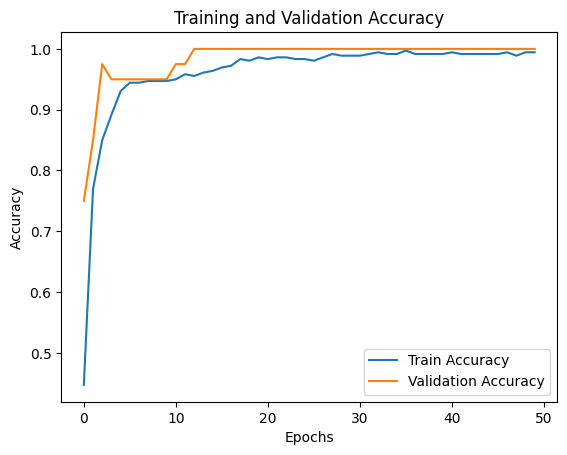

In [6]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Save to jpeg for textbook publication
plt.savefig('Figure 15.5 Training and Validation Accuracy.jpeg', dpi=300)

plt.show()

In [8]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"AUC: {auc:.2f}")
print("Classification Report:")
print(report)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Accuracy: 0.99
AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.98      1.00      0.99        46

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [9]:
new_data = pd.DataFrame({
    "Annual Income": [55000],
    "Debt-to-Income Ratio": [18],
    "Credit History Encoded": [1]  # 'Average'
})

new_data_scaled = scaler.transform(new_data)

prediction = model.predict(new_data_scaled)
predicted_class = (prediction > 0.5).astype(int)

print(f"Predicted Probability: {prediction[0][0]:.2f}")
print("Predicted Class:", "Creditworthy" if predicted_class[0][0] == 1 else "Not Creditworthy")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Probability: 1.00
Predicted Class: Creditworthy


# Your Project

Saving 15_your_project_neural_networks.csv to 15_your_project_neural_networks.csv
Epoch 1/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8324 - loss: 0.3335 - val_accuracy: 0.9810 - val_loss: 0.0697
Epoch 2/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9792 - loss: 0.0619 - val_accuracy: 0.9877 - val_loss: 0.0463
Epoch 3/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9860 - loss: 0.0438 - val_accuracy: 0.9912 - val_loss: 0.0346
Epoch 4/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9895 - loss: 0.0326 - val_accuracy: 0.9935 - val_loss: 0.0274
Epoch 5/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9913 - loss: 0.0288 - val_accuracy: 0.9920 - val_loss: 0.0245
Epoch 6/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9915 - loss: 0.0229 - val_accuracy: 0.9935 - val_loss: 0.0198
Epoch 7/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9924 - loss: 0.0216 - val_accuracy: 0.9933 - val_loss: 0.0200
Epoc

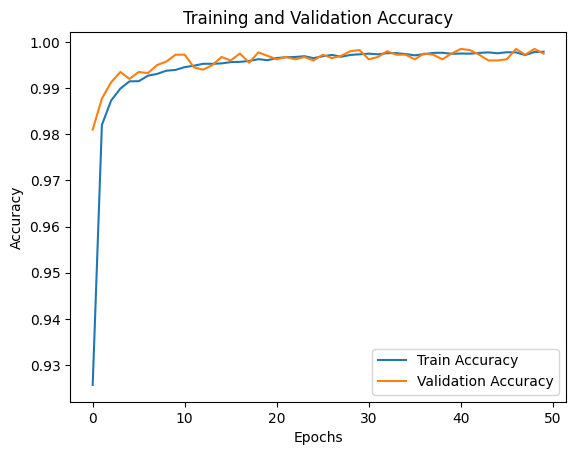

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 1.00
AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8438
           1       1.00      0.98      0.99      1562

    accuracy                           1.00     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Applicant 1:
  Predicted Probability of Default: 1.00
  Predicted Class: Default

Applicant 2:
  Predicted Probability of Default: 0.00
  Predicted Class: No Default



In [7]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Step 2: Upload CSV
from google.colab import files
uploaded = files.upload()  # Choose the CSV file when prompted

# Read the uploaded file
data = pd.read_csv('15_your_project_neural_networks.csv')  # <- change filename to match new dataset

# Step 3: Prepare Data
X = data[['Annual Income', 'Loan Amount', 'Credit Score', 'Number of Loans', 'Employment Encoded', 'Missed Payments']]
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Build Model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1, verbose=1)

# Step 6: Visualise Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Step 7: Evaluate Model
y_pred = (model.predict(X_test) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"AUC: {auc:.2f}")
print("Classification Report:")
print(report)

# Step 8: Make Predictions on New Data

new_applicants = pd.DataFrame({
    'Annual Income': [38000, 52000],
    'Loan Amount': [17000, 10000],
    'Credit Score': [580, 690],
    'Number of Loans': [2, 1],
    'Employment Encoded': [2, 0],  # 2 = Unemployed, 0 = Employed
    'Missed Payments': [3, 0]
})

# Standardise using the same scaler used for training
new_applicants_scaled = scaler.transform(new_applicants)

# Predict probabilities
predictions = model.predict(new_applicants_scaled)

# Convert probabilities to binary predictions
predicted_classes = (predictions > 0.5).astype(int)

# Display predictions
for i, (prob, pred) in enumerate(zip(predictions, predicted_classes)):
    print(f"Applicant {i+1}:")
    print(f"  Predicted Probability of Default: {prob[0]:.2f}")
    print(f"  Predicted Class: {'Default' if pred[0] == 1 else 'No Default'}\n")


# Extra:  Save Model and Reload Model


- Saving the model preserves its structure and learned weights for future use. This avoids the need for retraining.

- Reloading the model restores both its architecture and weights, allowing it to be used for prediction or further evaluation.

In [ ]:
# Step 9: Save Model
# Saving the model allows reuse without retraining.
model.save('credit_default_model.keras')
print("Model saved as credit_default_model.keras")



In [ ]:
# Step 10: Reload Model (using Keras format)
from tensorflow.keras.models import load_model

reloaded_model = load_model('credit_default_model.keras')
print("Model loaded from credit_default_model.keras")

# Optional: Evaluate reloaded model to confirm functionality
reloaded_predictions = (reloaded_model.predict(X_test) > 0.5).astype(int)
reloaded_accuracy = accuracy_score(y_test, reloaded_predictions)
print(f"Reloaded Model Accuracy: {reloaded_accuracy:.2f}")
